<a href="https://colab.research.google.com/github/danielhandzlik/assignments/blob/master/Handzlik_Raport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Ucieczka przed COVID-19"** 
##raport z kursu KoronaScience czyli twarde dane z nutką dystansu
##autor: Daniel Handzlik 
##nr albumu: 272535
##Politechnika Śląska
##Wydział: Automatyki, Elektroniki i Informatyki
##Kierunek: Automatyka i Robotyka


![COVID-19](https://media.defense.gov/2020/Mar/24/2002269423/780/780/0/200324-D-HN545-003.JPG)

# 1. Import określonych bibliotek, wstępne obrobienie danych oraz funkcja formatująca datę

In [0]:
#import bibliotek
import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
from typing import List

In [0]:
def funkcja(dane): 
    """
    Wywołanie:
    np. funkcja("zarazeni")
    """
    if (dane == "zarazeni"):
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
          f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
    if (dane == "smierci"):
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
          f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
    if (dane == "uzdrowieni"):
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
          f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
    return pd.read_csv(url, error_bad_lines=False)

In [0]:
def format_date(date: datetime.date):
    if os.name == "nt":
        return date.strftime('%#m/%#d/%y')
    else:
        return date.strftime('%-m/%-d/%y')

# 2. Dział śmierci

## Funkcja zwracająca ilość miejsc, które zostały ominięte przez śmierć przez COVID-19 w określonym dniu.


In [0]:
def ilosc_miejsc_ominietych_przez_smierc(date: datetime.date) -> int:
    """
    Funkcja zwraca miejsca, które zostały ominięte przez śmierć przez COVID-19 w określonym dniu.
    Wywołanie: ilosc_miejsc_ominietych_przez_smierc(datetime.date('rok', 'miesiąc', 'dzień'))
    np.
    ilosc_miejsc_ominietych_przez_smierc(datetime.date(2020, 1, 27))
    Wynik: 45
    ilosc_miejsc_ominietych_przez_smierc(datetime.date(2020, 2, 1))
    Wynik: 58
    """
    data = format_date(date)
    return ((funkcja("smierci")[data]==0)==(funkcja("zarazeni")[data]>0)).sum()

In [267]:
ilosc_miejsc_ominietych_przez_smierc(datetime.date(2020, 2, 1))

58

## Funkcja zwracająca ilość miejsc, które śmierć przez COVID-19 w określonym dniu nie oszczędziła.

In [0]:
def ilosc_miejsca_nieoszczedzone_przez_smierc(date: datetime.date) -> int:
    """
    Funkcja zwracająca miejsca, które śmierć przez COVID-19 w określonym dniu nie oszczędziła.
    Wywołanie: ilosc_miejsca_nieoszczedzone_przez_smierc(datetime.date('rok', 'miesiąc', 'dzień'))
    np.
    ilosc_miejsca_nieoszczedzone_przez_smierc(datetime.date(2020, 3, 1))
    Wynik: 379
    ilosc_miejsca_nieoszczedzone_przez_smierc(datetime.date(2020, 2, 2))
    Wynik: 403
    """
    data = format_date(date)
    return ((funkcja("smierci")[data]!=0)==(funkcja("zarazeni")[data]>0)).sum()

In [265]:
ilosc_miejsca_nieoszczedzone_przez_smierc(datetime.date(2020, 2, 2))

403

# 3. Dział zarazy

## Funkcja zwracająca wybraną przez nas ilość nazw krai z największą ilością osób zarażonych w danym dniu z domyślnie wpisanym rokiem.

In [0]:
def kraje_z_max_zarazonych(ilosc: int, day: int, month: int, year: int = 2020) -> List[str]:
    """
    Funkcja zwraca wybraną przez nas ilość nazw krai z największą ilością osób zarażonych w danym dniu z domyślnie wpisanym rokiem.
    Wywołanie: kraje_z_max_zarazonych('ilość krai', 'dzień', 'miesiąc', 'rok')
    np.
    kraje_z_max_zarazonych(3, 12, 3, 2020)
    Wynik: ['China', 'Italy', 'Iran']
    kraje_z_max_zarazonych(4, 1, 2)
    ['China', 'Japan', 'Thailand', 'Singapore']
    """
    year=year%2000
    data = f"{month}/{day}/{year}"
    result = funkcja("zarazeni")[["Country/Region", data]].groupby("Country/Region").sum().sort_values(by=data)
    return result.tail(ilosc).index.tolist()[::-1]

In [154]:
kraje_z_max_zarazonych(4, 1, 2)

['China', 'Japan', 'Thailand', 'Singapore']

## Funkcja zwracająca wybraną przez nas ilość nazw krai z najmniejszą ilością osób zarażonych w danym dniu z domyślnie wpisanym rokiem.

In [0]:
def kraje_z_min_zarazonych(ilosc: int, day: int, month: int, year: int = 2020) -> List[str]:
    """
    Funkcja zwraca wybraną przez nas ilość nazw krai z najmniejszą ilością osób zarażonych w danym dniu z domyślnie wpisanym rokiem.
    Wywołanie: kraje_z_min_zarazonych('ilość krai', 'dzień', 'miesiąc', 'rok')
    np.
    kraje_z_min_zarazonych(3, 27, 2, 2020)
    Wynik: ['Kenya', 'Albania', 'Colombia']
    kraje_z_min_zarazonych(5, 20, 2)
    Wynik: ['Kenya', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia']
    """
    year=year%2000
    data = f"{month}/{day}/{year}"
    result = funkcja("zarazeni")[["Country/Region", data]].groupby("Country/Region").sum().sort_values(by=data, ascending=False)
    return result.tail(ilosc).index.tolist()[::-1]

In [156]:
kraje_z_min_zarazonych(200, 20, 2)

['Kenya',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Gabon',
 'Georgia',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Ecuador',
 'Honduras',
 'Iceland',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Jamaica',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Albania',
 'Kosovo',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Hungary',
 'Dominican Republic',
 'Denmark',
 'Czechia',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Cyprus',
 'Cuba',
 'Croatia',
 "Cote d'Ivoire",
 'Costa Rica',
 'Congo (Kinshasa)',
 'Liberia',
 'Congo (Brazzaville)',
 'Chile',
 'Central African Republic',
 'Cameroon',
 'Burkina Faso',
 'Bulgaria',
 'Brunei',
 'Colombia',
 'Liechtenstein',
 'Afghanistan',
 'Luxembourg',
 'Republic of the Congo',
 'Romania',
 'Rwanda',
 'L

# 4. Dział wyzdrowień

## Funkcja zwraca wybraną przez nas ilość nazw krai z największą ilością wyzdowień osób w danym dniu z domyślnie wpisanym rokiem.

In [0]:
def kraje_z_max_wyzdrowien(ilosc: int, day: int, month: int, year: int = 2020) -> List[str]:
    """
    Funkcja zwraca wybraną przez nas ilość nazw krai z największą ilością wyzdowień osób w danym dniu z domyślnie wpisanym rokiem.
    Wywołanie: kraje_z_max_wyzdrowien('ilość krai', 'dzień', 'miesiąc', 'rok')
    np.
    kraje_z_max_wyzdrowien(3, 12, 3, 2020)
    Wynik: ['China', 'Iran', 'Italy']
    kraje_z_max_wyzdrowien(6, 1, 2)
    ['China', 'Thailand', 'Australia', 'Vietnam', 'Japan', 'Dominican Republic']
    """
    year=year%2000
    data = f"{month}/{day}/{year}"
    result = funkcja("uzdrowieni")[["Country/Region", data]].groupby("Country/Region").sum().sort_values(by=data)
    return result.tail(ilosc).index.tolist()[::-1]

In [158]:
kraje_z_max_wyzdrowien(6, 1, 2)

['China', 'Thailand', 'Australia', 'Vietnam', 'Japan', 'Dominican Republic']

## Funkcja zwraca indexy miejsc, w których ilość wyzdrowień jest większa niż ilość śmierci w danym dniu

In [0]:
  def wiecej_wyzdrowien_niz_smierci(date: datetime.date) -> List[int]:
    """
    Funkcja zwraca indexy miejsc, w których ilość wyzdrowień jest większa niż ilość śmierci w danym dniu.
    Wywołanie: wiecej_wyzdrowien_niz_smierci(datetime.date(''rok', 'miesiac', 'dzien'))
    np.
    wiecej_wyzdrowien_niz_smierci(datetime.date(2020, 3, 15))
    Wynik: [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  15,  16,  18,  19,  21,  24,  25,  27,  28,  29,  30,  32,
             33,  34,  37,  38,  40,  41,  43,  44,  45,  46,  53,  55,  58,
             59,  60,  62,  64,  65,  68,  86,  92, 101, 110, 118, 128, 154,
            155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
            169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
            183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 202, 208]
    wiecej_wyzdrowien_niz_smierci(datetime.date(2020, 2, 15))
    Wynik:[  0,   1,   2,   3,   4,   6,   7,   9,  10,  11,  12,  13,  18,
             92, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167,
            168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
            182, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 202, 347,
            348, 403]
    """
    data = format_date(date)
    return funkcja("zarazeni").loc[(funkcja("smierci")[data]<funkcja("uzdrowieni")[data])].index.tolist()

In [160]:
wiecej_wyzdrowien_niz_smierci(datetime.date(2020, 2, 15))

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 18,
 92,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 202,
 347,
 348,
 403]

# 5. Wykres słupkowy "Porównanie ilości przypadków potwierdzonych zarażeń wirusem COVID-19 Niemcy/Polska"

In [0]:
def wykres_slupkowy(pierwszy: str, drugi: str, nazwa_1: str='Pierwszy', nazwa_2: str='Drugi', logarytmiczny: bool=False):
  """
    Funkcja wyświetlająca wykres słupkowy "Porównanie ilości przypadków potwierdzonych zarażeń wirusem COVID-19" 
    w określonych krajach oraz z możliwością wyboru czy to ma być wykres logarytmiczny czy nie.
    Funkcja zawiera również wartości domyślne.
    Wywołanie:wykres_slupkowy("Pierwszy kraj", "Drugi kraj, "Nazwa pierwszego kraju widoczna na wykresie", "Nazwa drugiego kraju widoczna na wykresie", True albo False)
    np. wykres_slupkowy("Poland", "Russia", "Polska", "Rosja", True)
        wykres_slupkowy("Poland", "Russia", "Polska", "Rosja")
        wykres_slupkowy("Poland", "Russia", "Polska"
        wykres_slupkowy("Poland", "Russia")
  """
  potwierdzone=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
  potwierdzone=potwierdzone.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Data')
  potwierdzone=potwierdzone.set_index(['Country/Region','Province/State','Data'])
  a=potwierdzone.loc[pierwszy]
  a=a.rename(columns={"Cases": nazwa_1})
  b=potwierdzone.loc[drugi]
  b=b.rename(columns={"Cases": nazwa_2})
  razem=a.merge(b, left_on="Data", right_on="Data")
  razem.plot(y=[nazwa_1, nazwa_2], 
             figsize=(14,5), 
             title='Porównanie ilości przypadków potwierdzonych zarażeń wirusem COVID-19', 
             logy=logarytmiczny, 
             fontsize=7, 
             colormap='viridis', 
             kind='bar')
  plt.show()

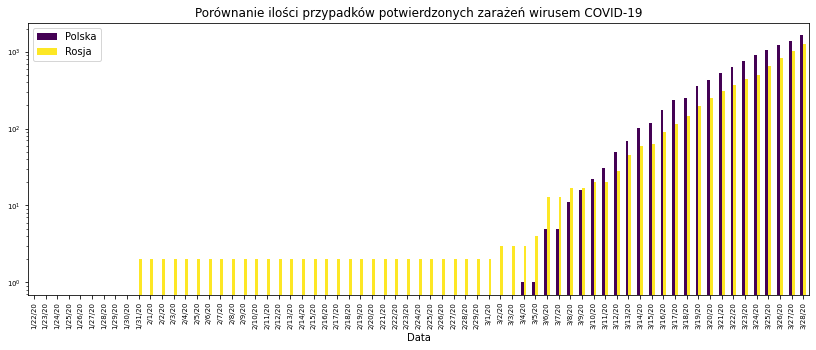

In [277]:
wykres_slupkowy("Poland", "Russia", "Polska", "Rosja", True)
#Czechia Czechy
#Germany Niemcy
#Slovakia Słowacja
#Ukraine Ukraina
#Belarus Białoruś
#Russia Rosja
#Lithuania Litwa

# 6. Mapa pokazująca kraje do których można było uciec przed zamknięciem granic w Polsce

In [0]:
def mapa_ucieczki(typ: str, poczatek: int, koniec: int, wielkosc: int=800):
  """
    Funkcja wyświetlająca mapę pokazującą kraje do których można było uciec przed zamknięciem granic w Polsce.
    Funkcja zawiera również wartość domyślną wielkości == 800.
    Wywołanie:mapa_ucieczki('kontynent/swiat', 'początek zakresu', 'koniec zakresu', 'wielkość mapki')
    np. mapa_ucieczki('world', 0, 300, 600)
        mapa_ucieczki('world', 0, 300)
  """
  mapka = funkcja("zarazeni").groupby(["Country/Region"]).max().reset_index()
  #15 marca Polska zamyka granice!
  mapka['size'] = mapka["3/14/20"]
  mapa = px.choropleth(mapka, 
                      locations="Country/Region", 
                      locationmode='country names', 
                      color="3/14/20", 
                      hover_name="Country/Region", 
                      range_color= [poczatek, koniec], 
                      projection="miller",  
                      title='Uciekaj w stronę czerni czyli misja schowaj sięw cieniu COVID19', 
                      scope=typ, 
                      width=wielkosc*1.2, 
                      height=wielkosc, 
                      color_continuous_scale="Viridis")
  mapa.show()

In [287]:
mapa_ucieczki('world', 0, 300, 600)
#world
#europe

# 7. Tabela top 20 miejsc w których jest najwięcej zarażeń COVID-19 w dniu ucieczki (unikaj tych miejsc!)

In [0]:
def tabela_zlej_ucieczki():
  """
    Funkcja wyświetlająca tabelę top 20 miejsc w których jest najwięcej zarażeń COVID-19 w dniu ucieczki czyli 14.03.2020
    Wywołanie: tabela_zlej_ucieczki()
    np. tabela_zlej_ucieczki()
  """
  return funkcja("zarazeni")[["Province/State", "Country/Region", "3/14/20"]].sort_values(by="3/14/20").tail(20).style.background_gradient(cmap='YlGnBu')

In [285]:
tabela_zlej_ucieczki()

,Province/State,Country/Region,3/14/20
1,nan,Japan,773
170,Denmark,Denmark,827
163,Jiangxi,China,935
443,Netherlands,Netherlands,959
17,nan,Sweden,961
162,Anhui,China,990
161,Hunan,China,1018
39,nan,Norway,1090
403,United Kingdom,United Kingdom,1140
160,Zhejiang,China,1227


# 8. Tabela top 400 miejsc w których jest najmniej zarażeń COVID-19 w dniu ucieczki (tam uciekaj!)

In [0]:
def tabela_dobrej_ucieczki():
  """
    Funkcja wyświetlająca tabelę top 400 miejsc w których jest najmniej zarażeń COVID-19 w dniu ucieczki czyli 14.03.2020
    Wywołanie: tabela_dobrej_ucieczki()
    np. tabela_dobrej_ucieczki()
  """
  return funkcja("zarazeni")[["Province/State", "Country/Region", "3/14/20"]].sort_values(by="3/14/20", ascending=False).tail(400).style.background_gradient(cmap='PuBuGn')

In [248]:
tabela_dobrej_ucieczki()

,Province/State,Country/Region,3/14/20
41,nan,Estonia,115
6,New South Wales,Australia,112
14,nan,Philippines,111
24,nan,Iraq,110
21,nan,Egypt,109
28,nan,Kuwait,104
64,nan,Saudi Arabia,103
73,nan,Poland,103
15,nan,India,102
105,Colorado,US,101
